In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import re

evalTime = 25.

#path2file_ = r'newMucil/{}_1476_{}_10to11_20mn_0s_10/'

path2file_ = r'FabFour/{}_1080_{}_10to25_20mn_0s_128/'

In [198]:
def getVal(mypath, filename,dtype=float,extension='.txt', header="infer",names = None):
    fullpath = pathresults +mypath+filename
    data_file_delimiter = ","
    if names is None:
        largest_column_count = 0
        with open(fullpath, 'r') as temp_f:
            lines = temp_f.readlines()
        last_line = lines[-1].strip()
        #print('last_line',last_line)
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)
        largest_column_count = len(array_from_last_line)
        names = [i for i in range(0, largest_column_count)]
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, 
                          header = header, names = names)
        #print('cst',cst.shape)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
    
def get_last_line_as_numpy_array(file_path,  dtype = float, verbose = False):
    with open(pathresults +file_path, 'r') as file:
        # Read all lines
        lines = file.readlines()

        # Check if there are any lines in the file
        if not lines:
            raise ValueError("The file is empty")

        # Get the last line
        
        try:
            last_line = lines[-1].strip()
        except:
            print('timeLine',file_path, len(lines))
            raise Exception

        # Split the last line by commas and convert to NumPy array
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)
        if verbose:
            print(file_path, len(array_from_last_line), end=", ")

        return array_from_last_line

def getCylIdx(path2file):
    fileName = "rhizoSegsId.txt"
    fullpath = path2file+fileName
    rhizoSegsId = get_last_line_as_numpy_array(fullpath, dtype = int, verbose = True)
    print('rhizoSegsId',max(rhizoSegsId))
    return rhizoSegsId
    
def list_files_with_prefix(folder_path, prefix):
    file_names = []
    for file_name in os.listdir(pathresults+folder_path):
        if file_name.startswith(prefix):
            file_names.append(file_name)
    return file_names

# cylinder max konz (per cell)
def getData_(cid,gId,path2file):
    fileName = "cyl_val/Cyl_cellVol_"+str(gId)+".txt"
    cVol = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
    if cid == volIdx:
        return sum(cVol)
    elif cid <= 9:
        if cid <= 2:# == 0:
            fileName = "cyl_val/Cyl_watercontent_"+str(gId)+".txt"
            theta = get_last_line_as_numpy_array(path2file+fileName,dtype = float)
            cVol *= theta#cm3 scv to cm3 water
            if cid == 0:
                return sum(cVol)
        fileName = "cyl_val/Cyl_content"+str(cid)+"_"+str(gId)+".txt"
        Q1 = get_last_line_as_numpy_array(path2file+fileName,  dtype = float)
        konz = sum(Q1)/sum(cVol) #mol/cm3 or cm3/cm3
        return konz
    raise Exception

plantData = {0:'Q_Ag',1:'Q_Rm',2:'Q_Gr',3: 'Q_Exud_tot', 4:'Q_Mucil_tot',
             5:'Q_Exud',
             6:'Q_Mucil',7:'trans' ,
             8:'time',
             9:'pSet',10:'scenario'}

extensions = {0:'.txt',1:'.txt',2:'.txt',3: '.txt', 4:'.txt',
             5:'.txt',
             6:'.txt',8:'.txt', 7:'.csv'}
colNames=np.array(list(plantData.values()))
nToGet = len(plantData)-3 # all except pset and scenario

scenarios = [ "baseline", "lateDry","earlyDry"]
setIds = [19, 47, 76, 83]
exceptPset = []#[('baseline','19'),('baseline','47'),('baseline','83')]
#result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
#result_list_comp = [path2file.format(dI[0], dI[1]) 
#                    for dI in dataInput]

numPset = len(dataInput)


def getData():
    
    GiniAll = [[] for i in range(numPset)]
    
    for idSet, dI in enumerate(dataInput):
        GiniAll_ = pd.DataFrame(columns=colNames)
        print(idSet,end =", ")

        path2file = path2file_.format(dI[0], dI[1])

        time = np.array(list(
            pd.read_csv(pathresults + path2file + "time.txt", 
                           names = ["time","Qlight"])["time"][1:])) # because we have twice the initial value
        timemax = int((max(time))*10)/10
        print('timemax',max(time),timemax, len(time))
        
        if(True):#timemax==25):


            for cid in range(nToGet):
                Ginits = getVal(path2file,plantData[cid]+extensions[cid]
                            ).sum(axis=1)
                #print(plantData[cid])#,Ginits,type(Ginits))
                GiniAll_[plantData[cid]]= Ginits
            GiniAll_[plantData[nToGet]]= time
            GiniAll_[plantData[nToGet+1]]= dI[1]
            GiniAll_[plantData[nToGet+2]]= dI[0]
            
        GiniAll[idSet] = GiniAll_
    return GiniAll #cid pSet rr
    

In [199]:

GiniAll = getData()

0, timemax 25.000000000000423 25.0 1080
1, timemax 25.000000000000423 25.0 1080
2, timemax 25.000000000000423 25.0 1080
3, timemax 25.000000000000423 25.0 1080
4, timemax 25.000000000000423 25.0 1080
5, timemax 25.000000000000423 25.0 1080
6, timemax 25.000000000000423 25.0 1080
7, timemax 25.000000000000423 25.0 1080
8, timemax 25.000000000000423 25.0 1080
9, timemax 23.81944444444484 23.8 995
10, timemax 20.45833333333363 20.4 753
11, timemax 25.000000000000423 25.0 1080


In [200]:
df = pd.DataFrame([pd.DataFrame(Gini, dtype = object) for Gini in GiniAll],
                  dtype = object)[0]

/home/m.giraud/.local/lib/python3.8/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [201]:
df[0].columns


Index(['Q_Ag', 'Q_Rm', 'Q_Gr', 'Q_Exud_tot', 'Q_Mucil_tot', 'Q_Exud',
       'Q_Mucil', 'trans', 'time', 'pSet', 'scenario'],
      dtype='object')

In [202]:
df.to_pickle('./plantData.pkl')

In [197]:
dd['scenario']

0       baseline
1       baseline
2       baseline
3       baseline
4       baseline
          ...   
1075    baseline
1076    baseline
1077    baseline
1078    baseline
1079    baseline
Name: scenario, Length: 1080, dtype: object

In [193]:
np.diff(dd['theta'])

array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [203]:
for dd in df:
    dd['transCumul']=np.cumsum(dd['trans'])

In [186]:
dd['trans']

0       0.013389
1       0.037794
2       0.058014
3        0.07267
4       0.083957
          ...   
1075    0.345496
1076    0.255425
1077    0.134248
1078    0.020115
1079    0.020135
Name: trans, Length: 1080, dtype: object

In [155]:
np.where(pset_==np.array(setIds))[0][0]

3

In [152]:
pset_

83

[19, 47, 76, 83]

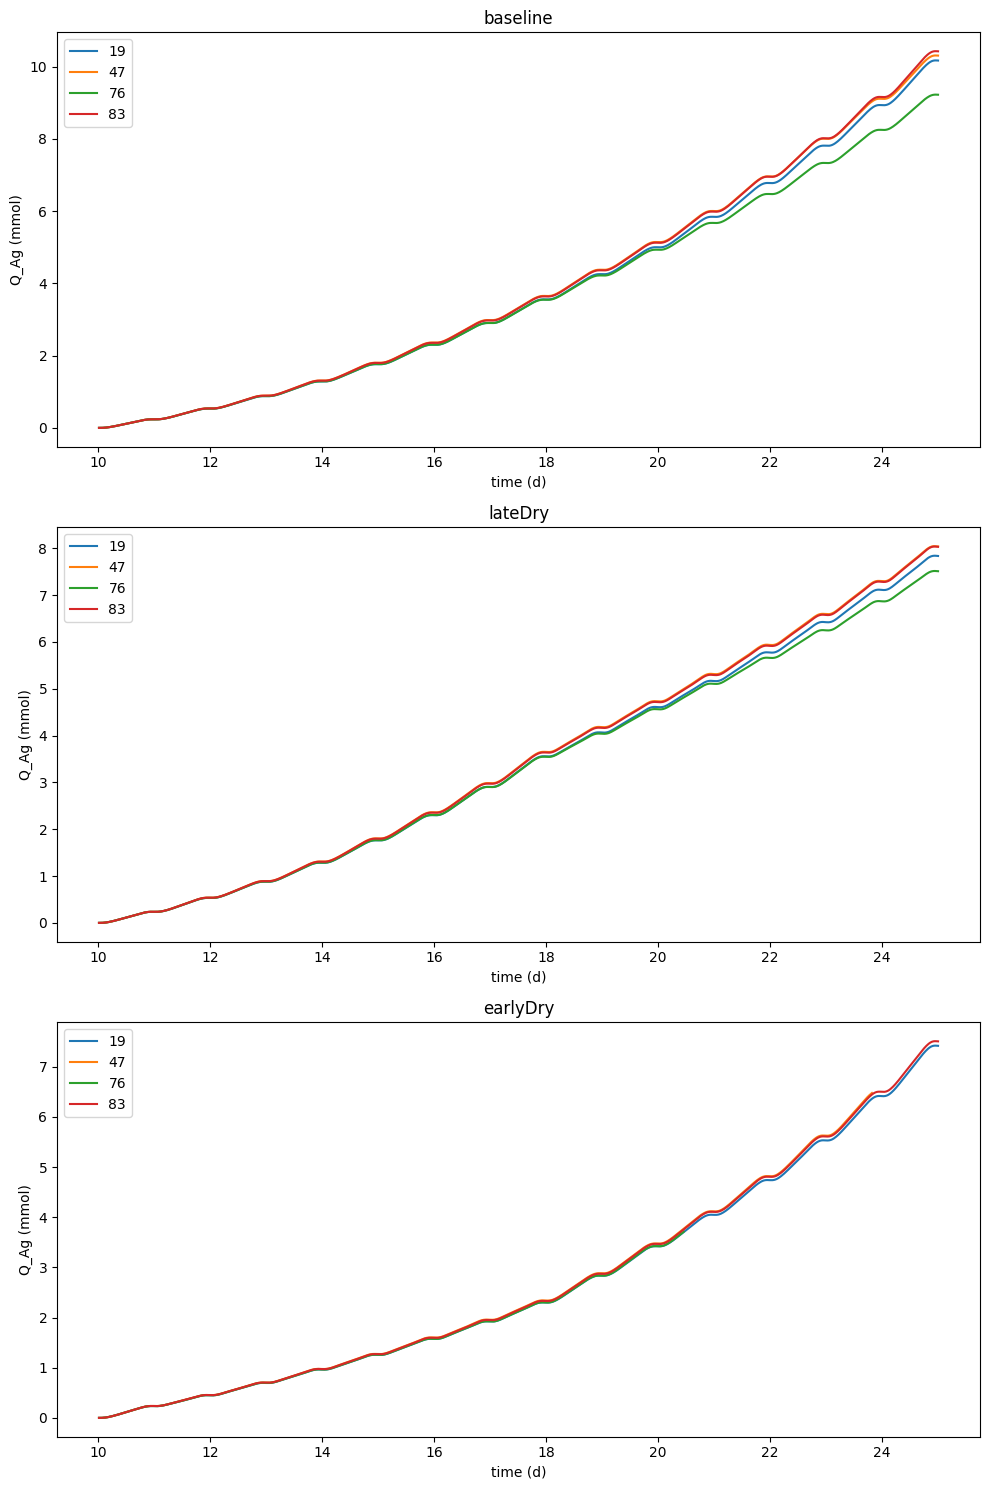

In [172]:
nrows = 3
ncols = 1

fig, ax = plt.subplots(nrows, ncols,figsize=(10,15))  # 2 rows, 2 columns
for dd in df:
    pset_ = int(dd['pSet'].unique()[0])
    scenario_ = dd['scenario'].unique()[0]
    subplotid = np.where(scenario_==np.array(scenarios))[0][0]
    ax[subplotid].plot( dd['time'],dd['Q_Ag']*1000,label=str(pset_))
    transcumul = np.cumul()
    ax[subplotid].plot( dd['time'],transcumul*1000,label=str(pset_))
    ax[subplotid].set_xlabel('time (d)')
    ax[subplotid].set_ylabel('Q_Ag (mmol)')
    ax[subplotid].set_title(scenario_)
    ax[subplotid].legend() 
plt.tight_layout()

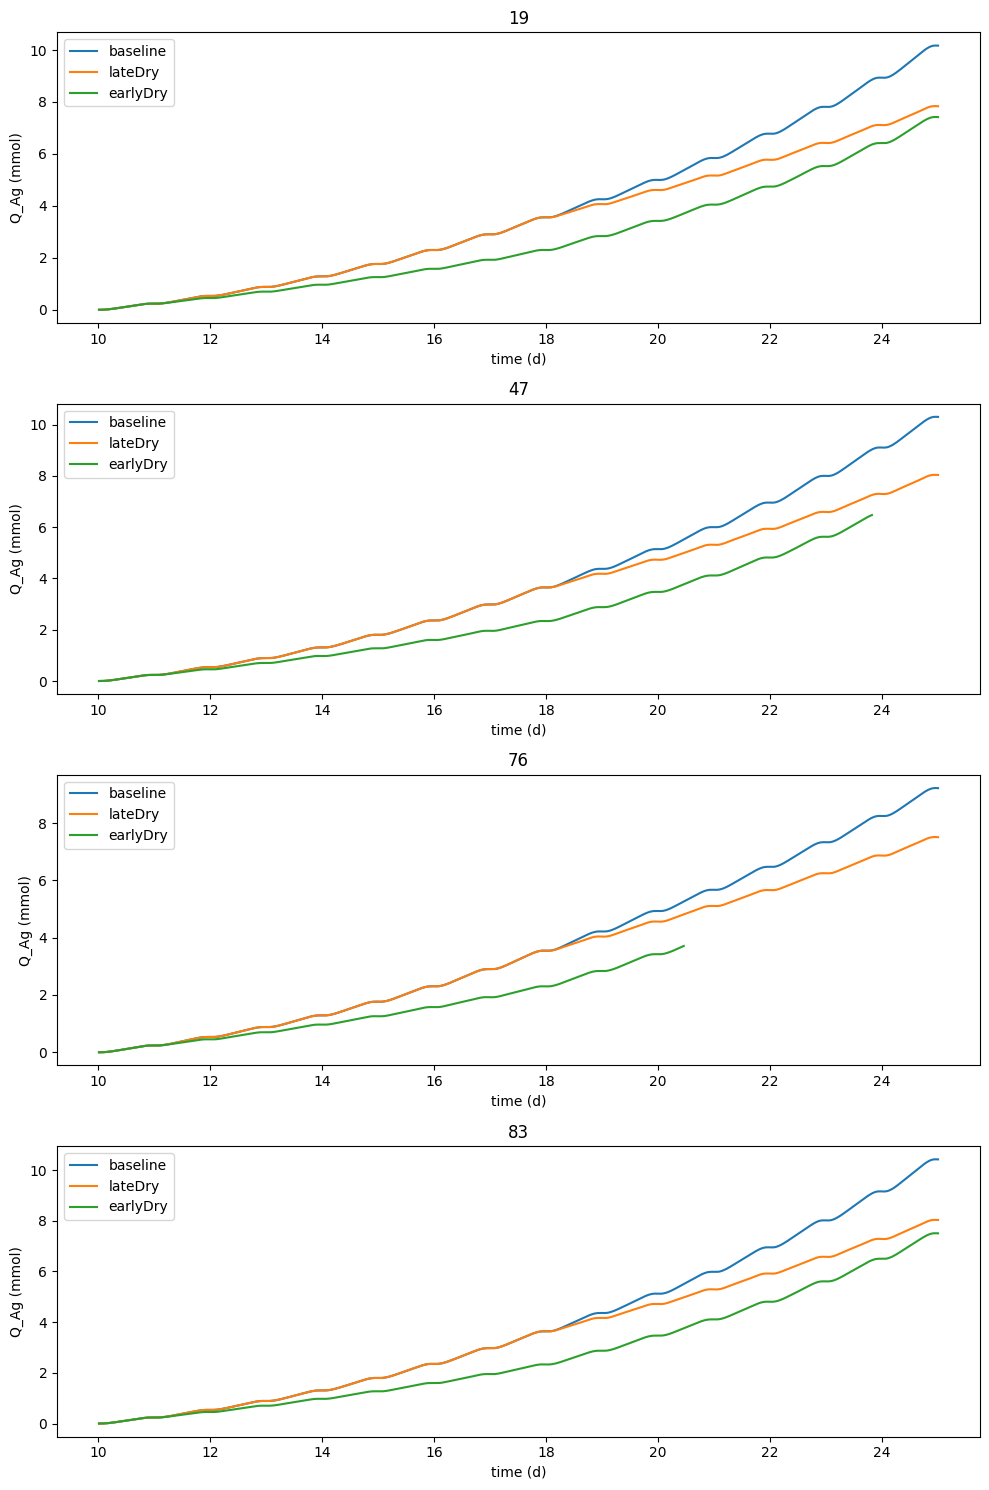

In [171]:
nrows = 4
ncols = 1

fig, ax = plt.subplots(nrows, ncols,figsize=(10,15))  # 2 rows, 2 columns
for dd in df:
    pset_ = int(dd['pSet'].unique()[0])
    scenario_ = dd['scenario'].unique()[0]
    subplotid = np.where(pset_==np.array(setIds))[0][0]
    ax[subplotid].plot( dd['time'],dd['Q_Ag']*1000,label=scenario_)
    ax[subplotid].set_xlabel('time (d)')
    ax[subplotid].set_ylabel('Q_Ag (mmol)')
    ax[subplotid].set_title(str(pset_))
    ax[subplotid].legend() 
plt.tight_layout()

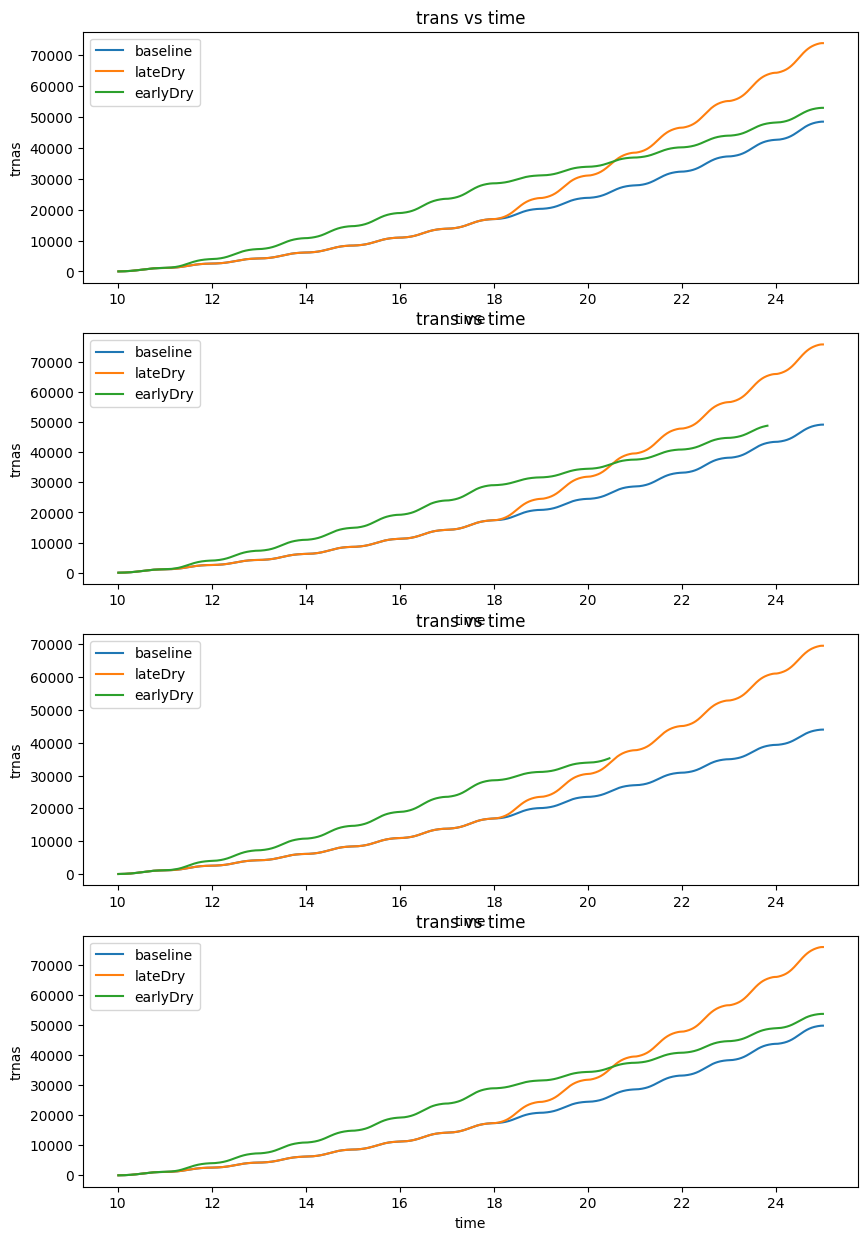

In [205]:
nrows = 4
ncols = 1
# higher than in the 1st paper
# probably in part because i increased the kr of the roots
cm3tommol = 1000*(1/18.01528)
ratioTrans = 250 
fig, ax = plt.subplots(nrows, ncols,figsize=(10,15))  # 2 rows, 2 columns
for dd in df:
    pset_ = int(dd['pSet'].unique()[0])
    scenario_ = dd['scenario'].unique()[0]
    subplotid = np.where(pset_==np.array(setIds))[0][0]
    ax[subplotid].plot( dd['time'],dd['transCumul']*cm3tommol,label=scenario_)
    ax[subplotid].set_xlabel('time')
    ax[subplotid].set_ylabel('trnas')
    ax[subplotid].set_title('trans vs time')
    ax[subplotid].legend() 

In [120]:

plantData_ = ['Q_Ag','Q_Rm','Q_Gr',#3: 'Q_Exud_tot', 4:'Q_Mucil_tot',
            'Q_Exud','Q_Mucil']
for gg in range(len(GiniAll)):
    GiniAll[0][plantData_[gg]+'_dot'] = GiniAll[0][plantData_[gg]][0]
    GiniAll[0].loc[1:,plantData_[gg]+'_dot'] = np.diff(GiniAll[0][plantData_[gg]])

In [128]:
GiniAll[0]#[['Q_Ag','Q_Ag_dot']]

,Q_Ag,Q_Rm,Q_Gr,Q_Exud_tot,Q_Mucil_tot,Q_Exud,Q_Mucil,time,pSet,scenario
0,-2.199162e-07,6.082918e-07,0.000003,0.000000,0.000000e+00,0.000004,1.224359e-11,10.013889,19,baseline
1,-3.285031e-07,1.233386e-06,0.000005,0.000004,1.224359e-11,0.000008,5.059246e-11,10.027778,19,baseline
2,-2.579565e-07,1.863434e-06,0.000008,0.000011,6.283605e-11,0.000012,1.158536e-10,10.041667,19,baseline
3,5.012546e-08,2.500480e-06,0.000010,0.000023,1.786896e-10,0.000016,2.083076e-10,10.055556,19,baseline
4,6.414775e-07,3.146817e-06,0.000013,0.000039,3.869972e-10,0.000019,3.277404e-10,10.069444,19,baseline
...,...,...,...,...,...,...,...,...,...,...
1075,1.017181e-02,2.862193e-03,0.006495,0.469131,5.403193e-03,0.000841,1.598380e-05,24.944444,19,baseline
1076,1.017226e-02,2.867085e-03,0.006507,0.469971,5.419177e-03,0.000842,1.602667e-05,24.958333,19,baseline
1077,1.017157e-02,2.871925e-03,0.006519,0.470813,5.435204e-03,0.000843,1.606971e-05,24.972222,19,baseline
1078,1.017016e-02,2.876717e-03,0.006531,0.471655,5.451274e-03,0.000843,1.611288e-05,24.986111,19,baseline


In [118]:
GiniAll[0]

,Q_Ag,Q_Rm,Q_Gr,Q_Exud_tot,Q_Mucil_tot,Q_Exud,Q_Mucil,time,pSet,scenario,Q_Ag_dot,Q_Rm_dot
0,-2.199166e-07,6.073150e-07,0.000003,0.000000,0.000000e+00,0.000004,1.218060e-11,10.013889,0,none,0.000000e+00,0.000000e+00
1,-3.285050e-07,1.231199e-06,0.000005,0.000004,1.218060e-11,0.000008,5.037250e-11,10.027778,0,none,-1.085884e-07,6.238835e-07
2,-2.579618e-07,1.859151e-06,0.000008,0.000008,5.037250e-11,0.000012,1.153384e-10,10.041667,0,none,7.054317e-08,6.279523e-07
3,5.011396e-08,2.491122e-06,0.000010,0.000012,1.153384e-10,0.000016,2.063318e-10,10.055556,0,none,3.080758e-07,6.319707e-07
4,6.414566e-07,3.128674e-06,0.000013,0.000016,2.063318e-10,0.000020,3.236509e-10,10.069444,0,none,5.913426e-07,6.375522e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.314465e-04,5.412241e-05,0.000156,0.000251,4.514016e-08,0.000254,4.630236e-08,10.944444,0,none,3.741232e-07,6.352995e-07
68,2.315322e-04,5.475171e-05,0.000158,0.000254,4.630236e-08,0.000258,4.747335e-08,10.958333,0,none,8.575253e-08,6.292903e-07
69,2.313940e-04,5.538015e-05,0.000160,0.000258,4.747335e-08,0.000261,4.865265e-08,10.972222,0,none,-1.382510e-07,6.284416e-07
70,2.311133e-04,5.600630e-05,0.000163,0.000261,4.865265e-08,0.000264,4.983954e-08,10.986111,0,none,-2.806584e-07,6.261507e-07
